In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import calendar
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf
from datetime import timedelta
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns 
from ggplot import *
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
from matplotlib.colors import ListedColormap
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text

In [10]:
air_visit = pd.read_csv('/Users/Xuhuiz2/Desktop/BAX 452 Group Project/air_visit_data.csv', parse_dates=['visit_date'])
air_reserve = pd.read_csv('/Users/Xuhuiz2/Desktop/BAX 452 Group Project/air_reserve.csv', parse_dates=['reserve_datetime', 'visit_datetime'])
air_store = pd.read_csv('/Users/Xuhuiz2/Desktop/BAX 452 Group Project/air_store_info.csv')
date = pd.read_csv('/Users/Xuhuiz2/Desktop/BAX 452 Group Project/date_info.csv')

In [12]:
air_visit['day_of_week'] = air_visit['visit_date'].dt.dayofweek
air_visit.loc[air_visit['day_of_week'] == 0, 'day_of_week'] = 'Monday'
air_visit.loc[air_visit['day_of_week'] == 1, 'day_of_week'] = 'Tuesday'
air_visit.loc[air_visit['day_of_week'] == 2, 'day_of_week'] = 'Wednesday'
air_visit.loc[air_visit['day_of_week'] == 3, 'day_of_week'] = 'Thursday'
air_visit.loc[air_visit['day_of_week'] == 4, 'day_of_week'] = 'Friday'
air_visit.loc[air_visit['day_of_week'] == 5, 'day_of_week'] = 'Saturday'
air_visit.loc[air_visit['day_of_week'] == 6, 'day_of_week'] = 'Sunday'

In [14]:
air_visit['month'] = air_visit['visit_date'].dt.month
air_visit.loc[air_visit['month'] == 1, 'month'] = 'Jan'
air_visit.loc[air_visit['month'] == 2, 'month'] = 'Feb'
air_visit.loc[air_visit['month'] == 3, 'month'] = 'Mar'
air_visit.loc[air_visit['month'] == 4, 'month'] = 'Apr'
air_visit.loc[air_visit['month'] == 5, 'month'] = 'May'
air_visit.loc[air_visit['month'] == 6, 'month'] = 'Jun'
air_visit.loc[air_visit['month'] == 7, 'month'] = 'Jul'
air_visit.loc[air_visit['month'] == 8, 'month'] = 'Aug'
air_visit.loc[air_visit['month'] == 9, 'month'] = 'Sep'
air_visit.loc[air_visit['month'] == 10, 'month'] = 'Oct'
air_visit.loc[air_visit['month'] == 11, 'month'] = 'Nov'
air_visit.loc[air_visit['month'] == 12, 'month'] = 'Dec'

In [18]:
visit_store = pd.merge(air_store, air_visit, on = 'air_store_id', how = 'left')

In [19]:
visit_store['day_of_week'] = visit_store['visit_date'].dt.dayofweek
visit_store.loc[visit_store['day_of_week'] == 0, 'day_of_week'] = 'Monday'
visit_store.loc[visit_store['day_of_week'] == 1, 'day_of_week'] = 'Tuesday'
visit_store.loc[visit_store['day_of_week'] == 2, 'day_of_week'] = 'Wednesday'
visit_store.loc[visit_store['day_of_week'] == 3, 'day_of_week'] = 'Thursday'
visit_store.loc[visit_store['day_of_week'] == 4, 'day_of_week'] = 'Friday'
visit_store.loc[visit_store['day_of_week'] == 5, 'day_of_week'] = 'Saturday'
visit_store.loc[visit_store['day_of_week'] == 6, 'day_of_week'] = 'Sunday'

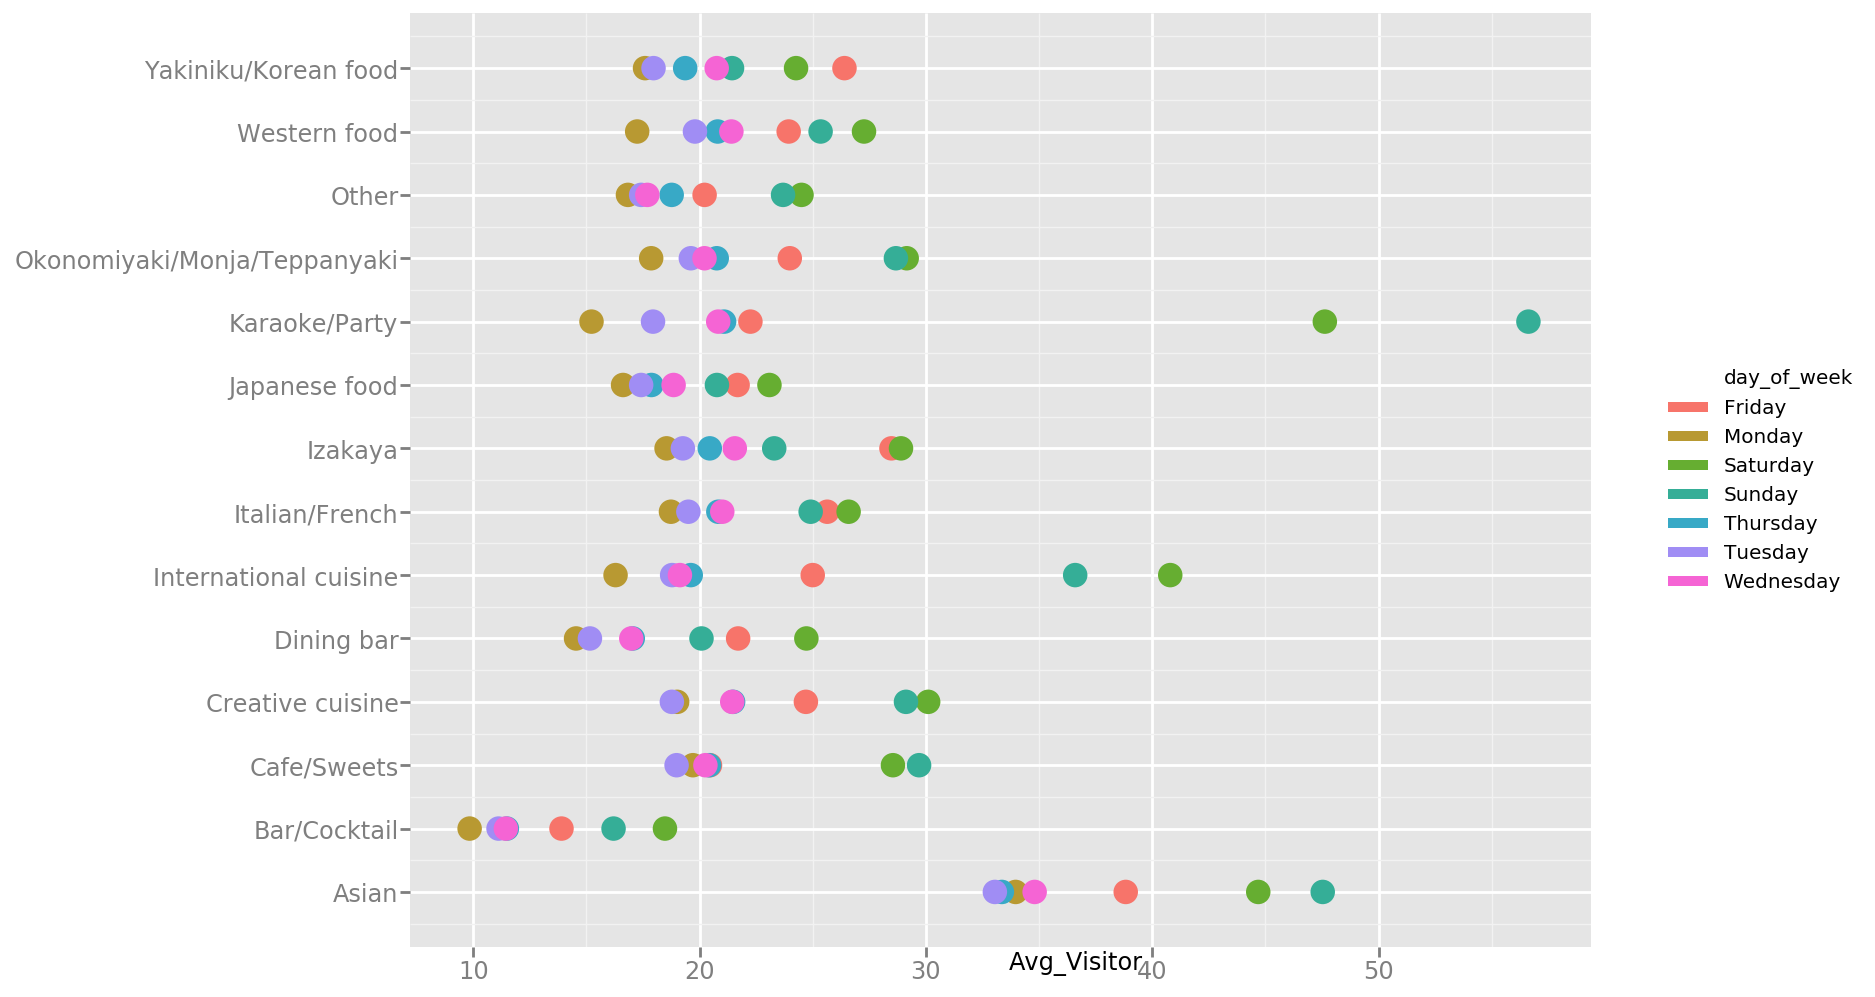

<ggplot: (-9223372036564675349)>

In [20]:
p = visit_store.groupby(['day_of_week', 'air_genre_name'])['visitors'].mean()
p = pd.DataFrame(p)
p = p.reset_index()
ggplot(p, aes(x = 'visitors', y = 'air_genre_name', color = 'day_of_week')) + geom_point(size = 150) + xlab('\nAvg_Visitor') + ylab(' ')

In [21]:
visit_store = pd.merge(air_visit, air_store, on = 'air_store_id', how = 'left')

In [22]:
q = visit_store.groupby(['visit_date', 'air_genre_name'])['visitors'].mean()
q = pd.DataFrame(q)
q = q.reset_index()

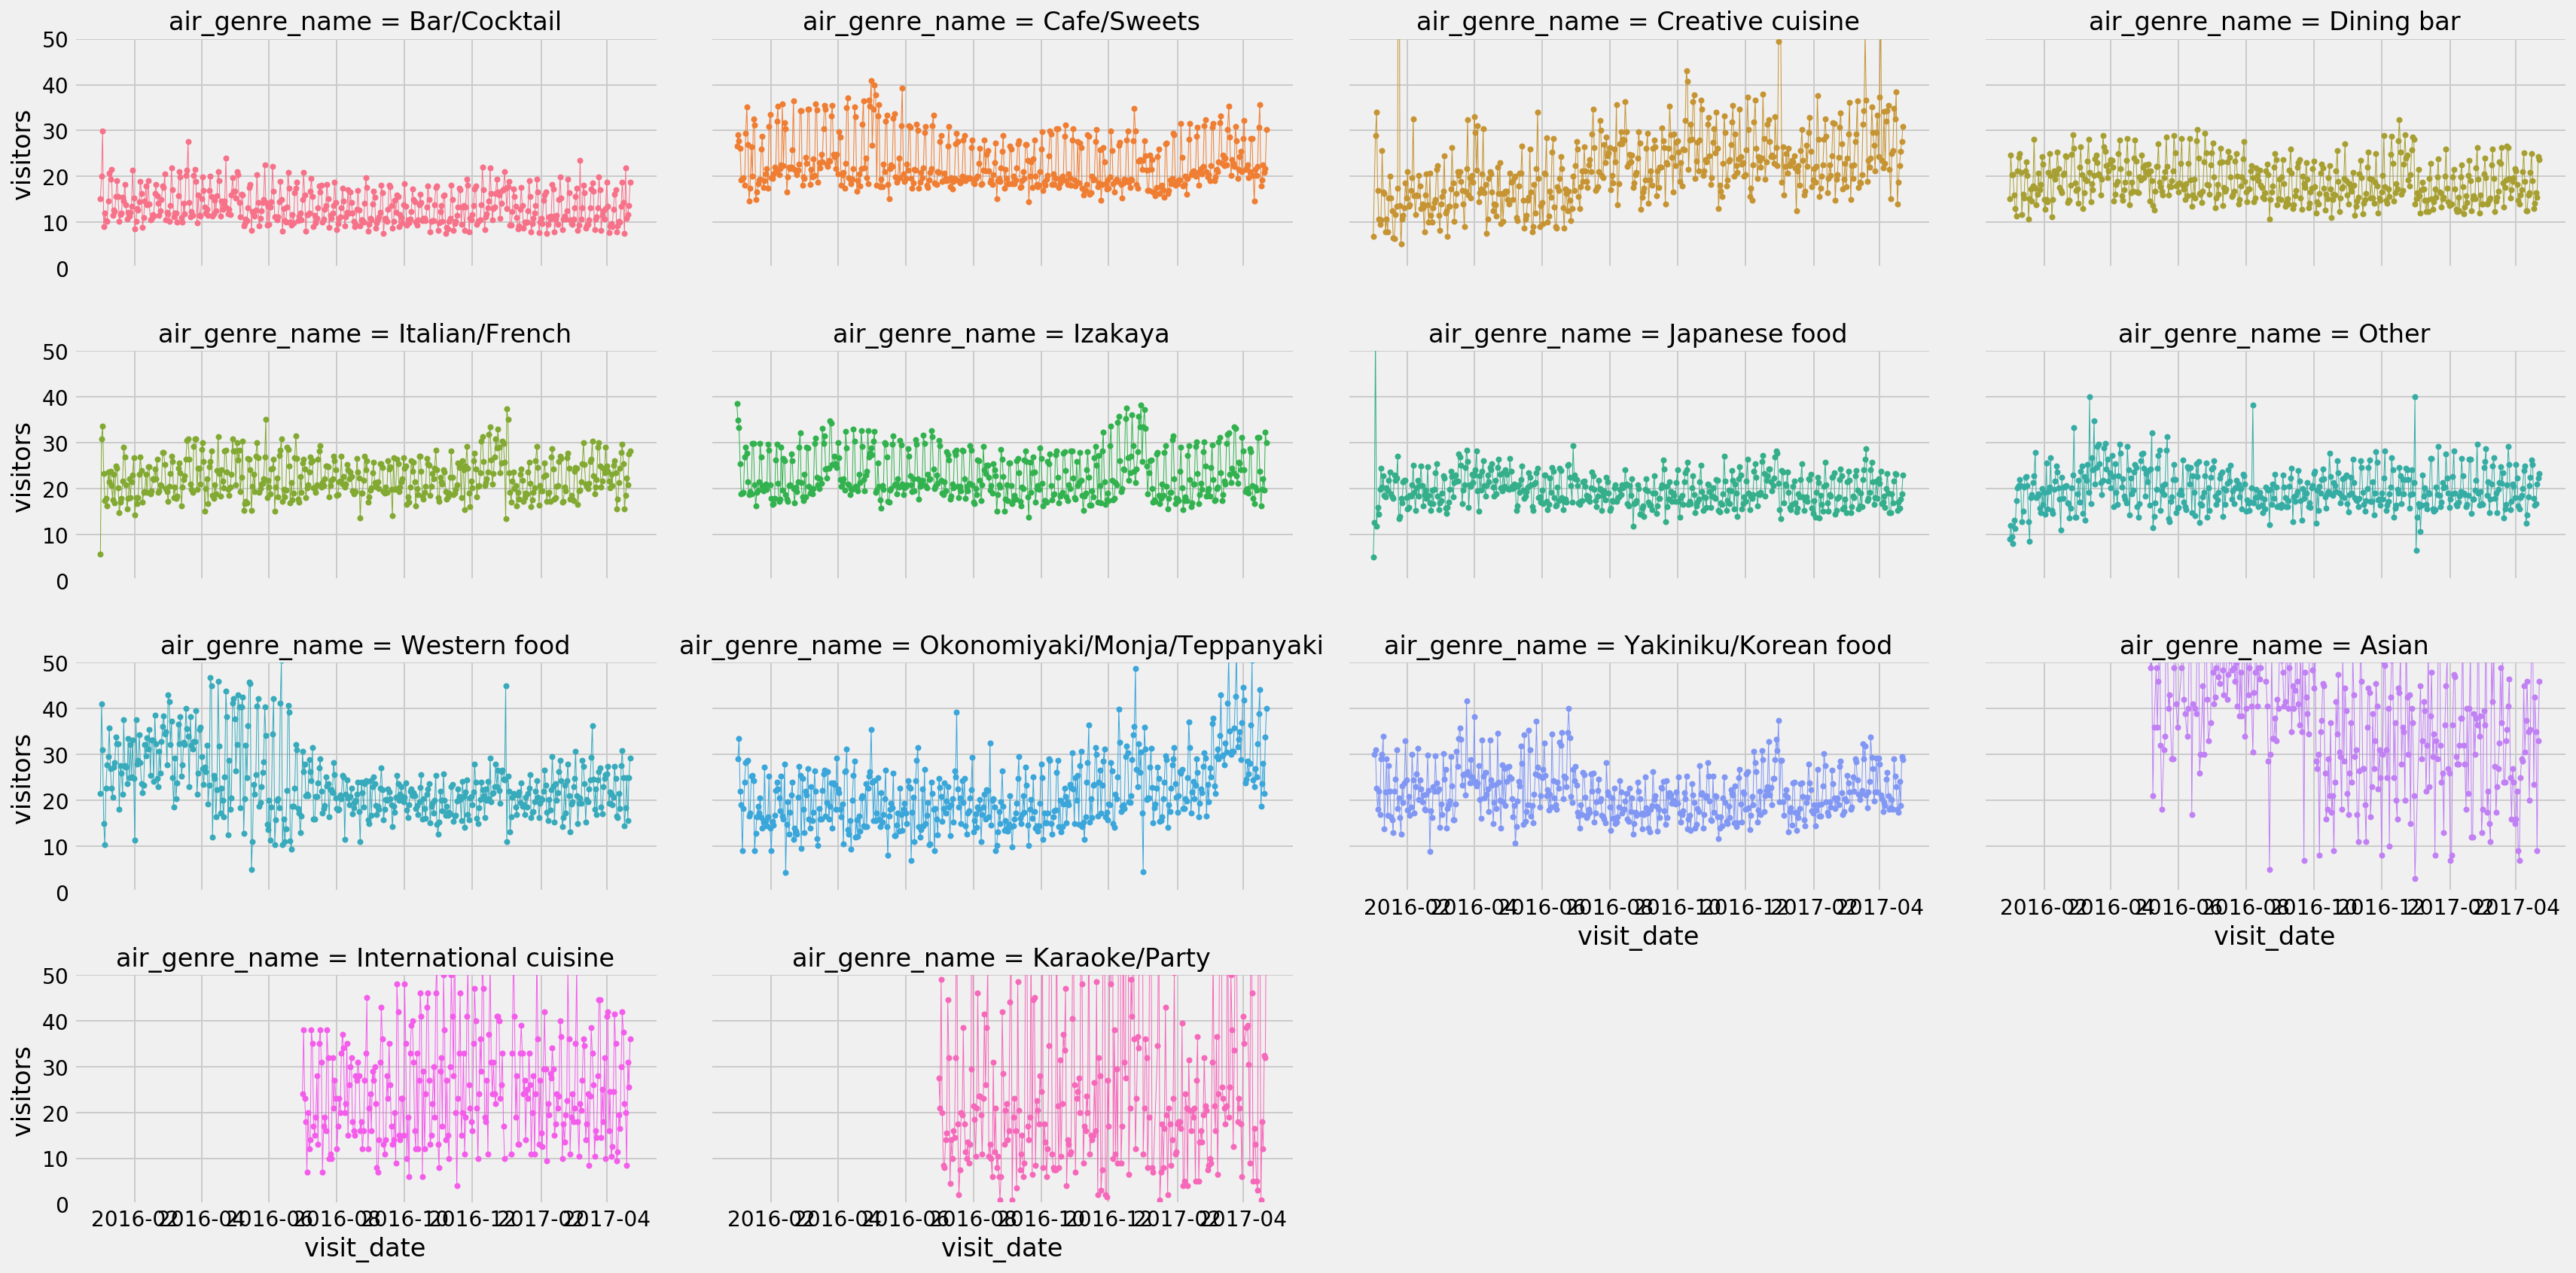

In [23]:
fig = plt.figure(figsize = (20,20))
ax = sns.FacetGrid(q, col="air_genre_name", col_wrap=4, size=3, hue='air_genre_name',margin_titles=True,
                  aspect=2.0, palette='husl', ylim=(0,50))
ax = ax.map(plt.plot, "visit_date", "visitors",  marker=".", linewidth = 0.5)

In [24]:
air_reserve['visit_date'] = air_reserve['visit_datetime']
foo = air_reserve.groupby(['air_store_id','visit_date'])['reserve_visitors'].sum()
foo = pd.DataFrame(foo)
foo = foo.reset_index()

In [25]:
all_reserve = pd.merge(foo, air_visit, on = ['air_store_id', 'visit_date'], how = 'inner')
date['calendar_date'] = pd.to_datetime(date['calendar_date'])

In [26]:
reserve_date = pd.merge(all_reserve, date, left_on = 'visit_date', right_on = 'calendar_date', how = 'left')
reserve_date['diff'] = reserve_date['visitors'] - reserve_date['reserve_visitors']
reserve_date.loc[reserve_date['holiday_flg'] == 0, 'holiday_flg'] = False
reserve_date.loc[reserve_date['holiday_flg'] == 1, 'holiday_flg'] = True

/Users/Xuhuiz2/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



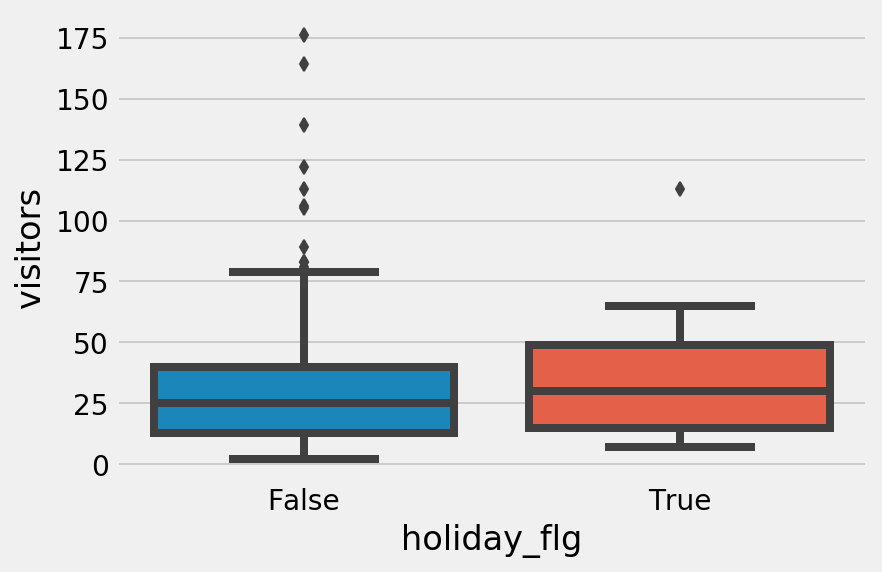

In [27]:
ax = sns.boxplot(x = "holiday_flg", y = "visitors", data = reserve_date)

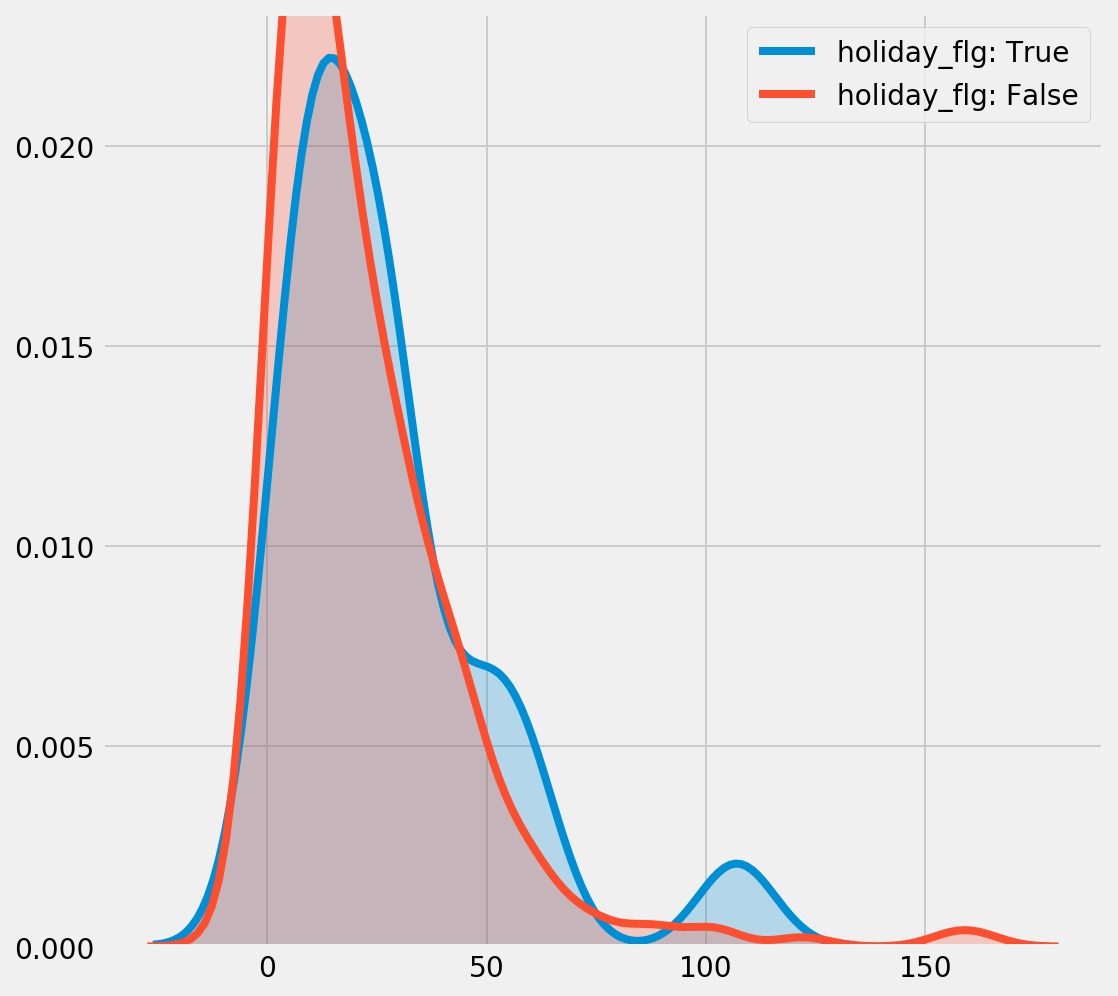

In [28]:
fig = plt.figure(figsize = (8,8))
sns.kdeplot(reserve_date[reserve_date['holiday_flg'] == True]['diff'], label = 'holiday_flg: True', shade = True)
sns.kdeplot(reserve_date[reserve_date['holiday_flg'] == False]['diff'], label = 'holiday_flg: False', shade = True)

In [29]:
visit_store['day_of_week'] = visit_store['visit_date'].dt.dayofweek
visit_store.loc[visit_store['day_of_week'] == 0, 'day_of_week'] = 'Monday'
visit_store.loc[visit_store['day_of_week'] == 1, 'day_of_week'] = 'Tuesday'
visit_store.loc[visit_store['day_of_week'] == 2, 'day_of_week'] = 'Wednesday'
visit_store.loc[visit_store['day_of_week'] == 3, 'day_of_week'] = 'Thursday'
visit_store.loc[visit_store['day_of_week'] == 4, 'day_of_week'] = 'Friday'
visit_store.loc[visit_store['day_of_week'] == 5, 'day_of_week'] = 'Saturday'
visit_store.loc[visit_store['day_of_week'] == 6, 'day_of_week'] = 'Sunday'

In [30]:
g = reserve_date.groupby(['day_of_week_x', 'holiday_flg'])['visitors'].mean()
g = pd.DataFrame(g)
g = g.reset_index()

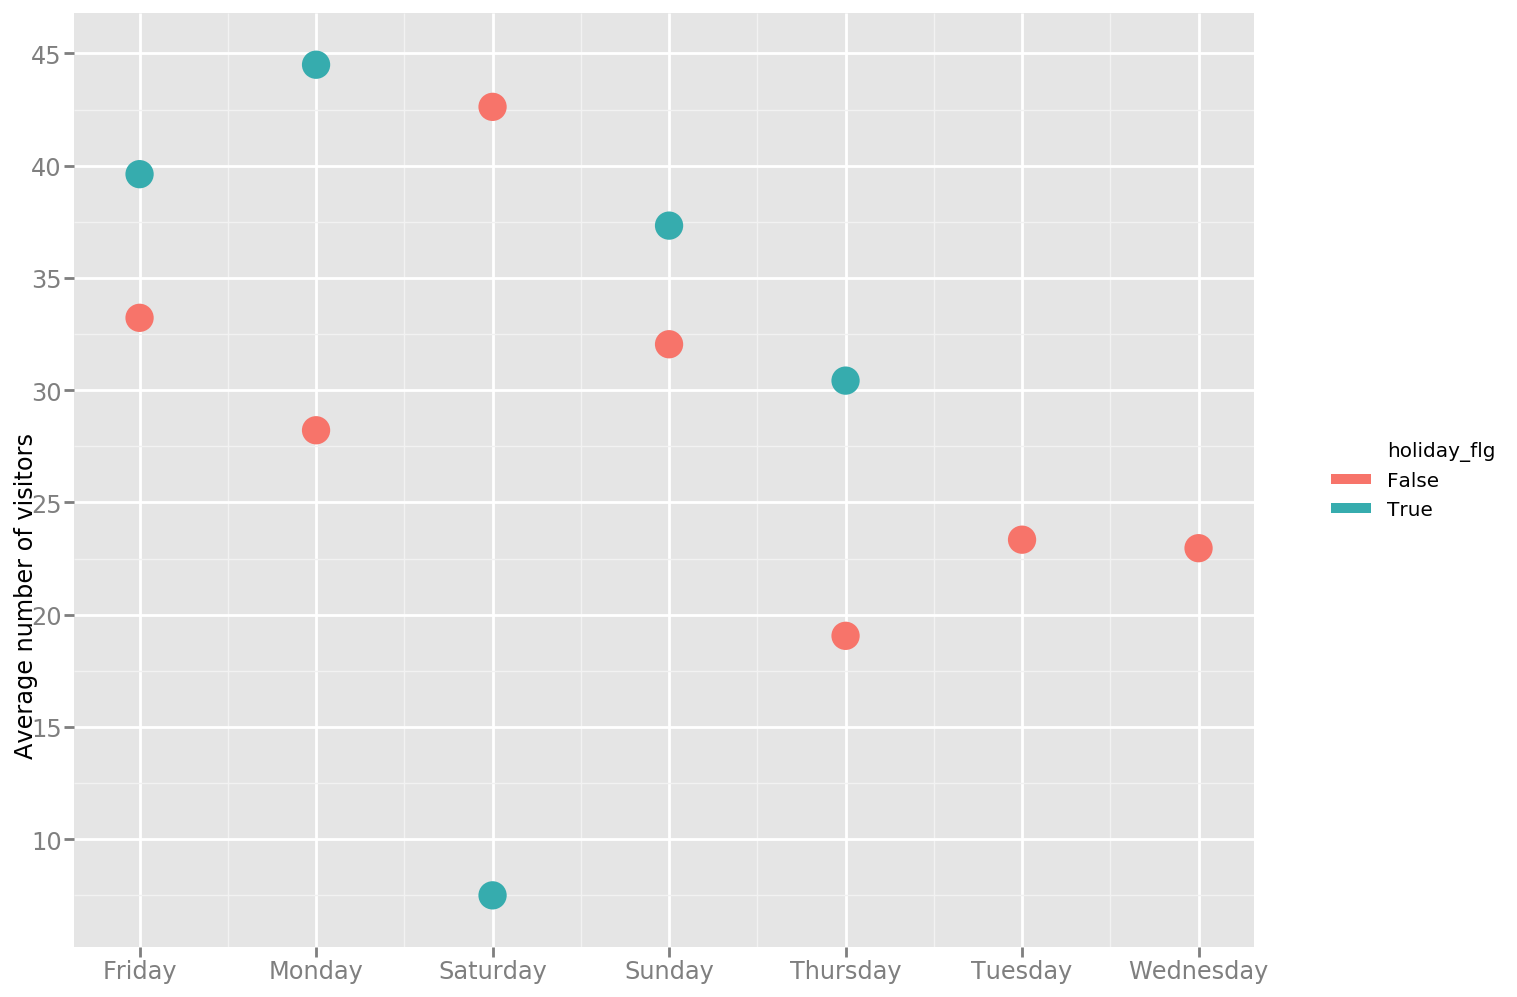

<ggplot: (-9223372036564640210)>

In [31]:
ggplot(g, aes(x = 'day_of_week_x', y = 'visitors', color = 'holiday_flg')) + geom_point(size = 200) + labs(x = ' ', y = "Average number of visitors")

In [32]:
reserve_date['month'] = visit_store['visit_date'].dt.month
reserve_date['year'] = visit_store['visit_date'].dt.year
reserve_date['week'] = visit_store['visit_date'].dt.week

In [33]:
reserve_date.loc[reserve_date['holiday_flg'] == False, 'holiday_flg'] = 0
reserve_date.loc[reserve_date['holiday_flg'] == True, 'holiday_flg'] = 1

In [34]:
reserve_date.loc[reserve_date['day_of_week_x'] == 'Monday', 'day_of_week_x'] = 0
reserve_date.loc[reserve_date['day_of_week_x'] == 'Tuesday', 'day_of_week_x'] = 1
reserve_date.loc[reserve_date['day_of_week_x'] == 'Wednesday', 'day_of_week_x'] = 2
reserve_date.loc[reserve_date['day_of_week_x'] == 'Thursday', 'day_of_week_x'] = 3
reserve_date.loc[reserve_date['day_of_week_x'] == 'Friday', 'day_of_week_x'] = 4
reserve_date.loc[reserve_date['day_of_week_x'] == 'Saturday', 'day_of_week_x'] = 5
reserve_date.loc[reserve_date['day_of_week_x'] == 'Sunday', 'day_of_week_x'] = 6

In [35]:
reserve_date = reserve_date.drop(['visit_date', 'day_of_week_y', 'calendar_date', 'diff'], axis = 1)
reserve_date['day_of_week'] = reserve_date['day_of_week_x']
reserve_date = reserve_date.drop(['day_of_week_x'], axis = 1)

In [36]:
reserve_date = reserve_date[['air_store_id', 'year', 'month', 'week', 'day_of_week', 'holiday_flg', 'reserve_visitors', 'visitors']]
reserve_date.head()

,air_store_id,year,month,week,day_of_week,holiday_flg,reserve_visitors,visitors
0,air_0164b9927d20bcc3,2016,1,2,5,0,9,25
1,air_0164b9927d20bcc3,2016,1,2,5,0,9,11
2,air_04341b588bde96cd,2016,1,2,2,0,16,28
3,air_04cae7c1bc9b2a0b,2016,1,2,1,0,16,63
4,air_08cb3c4ee6cd6a22,2016,1,3,4,0,5,17
